In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
mall_data=pd.read_csv("Mall_Customers.csv")

In [11]:
mall_data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
mall_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
mall_data.columns=["custId","Gender","Age","Income","Spend"]

In [17]:
seg_data=mall_data.iloc[:,1:]

In [19]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lc=LabelEncoder()
gender=lc.fit_transform(seg_data["Gender"])

In [23]:
seg_data.drop("Gender",axis=1,inplace=True)

In [25]:
seg_data["Gender"]=gender

In [27]:
seg_data

,Age,Income,Spend,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(seg_data)

In [31]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [33]:
norm_z=linkage(seg_data,method='complete',metric='euclidean')

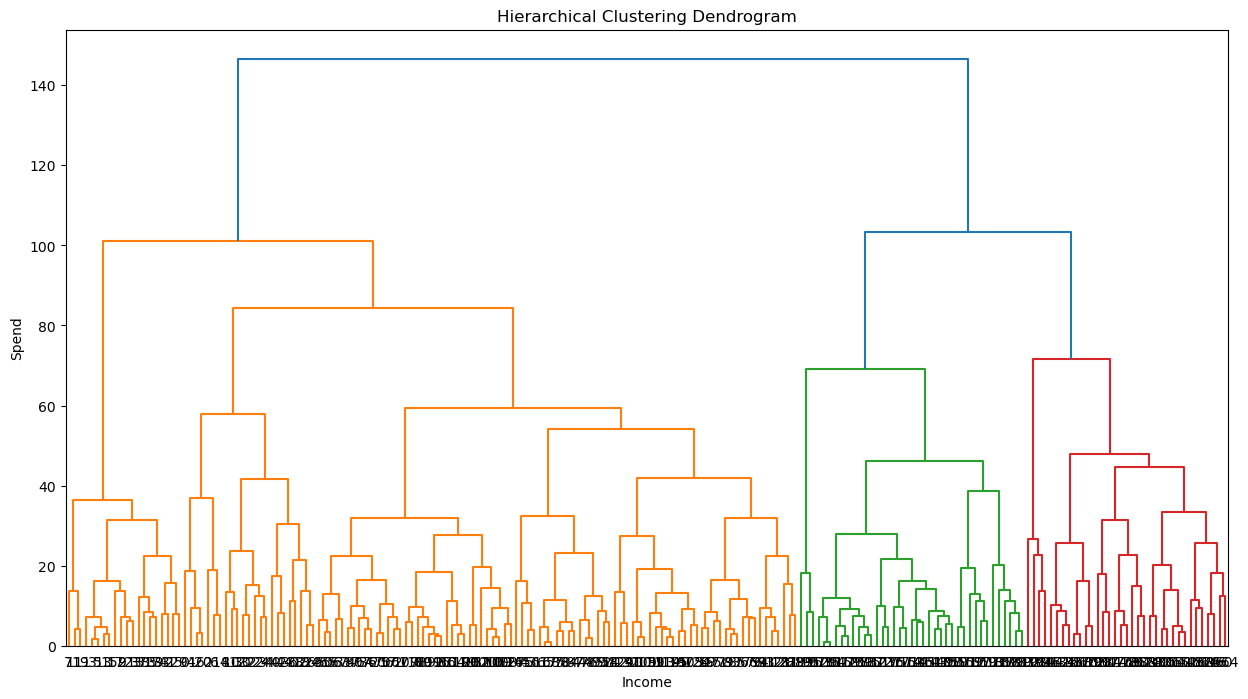

In [35]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Income');plt.ylabel('Spend')
sch.dendrogram(norm_z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [40]:
hierarical_clustering=AgglomerativeClustering(n_clusters=3,linkage='complete',metric='euclidean').fit(seg_data)
hierarical_clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [42]:
cluster_labels=pd.Series(hierarical_clustering.labels_)
seg_data['clust']=cluster_labels
mall_data['clust']=cluster_labels

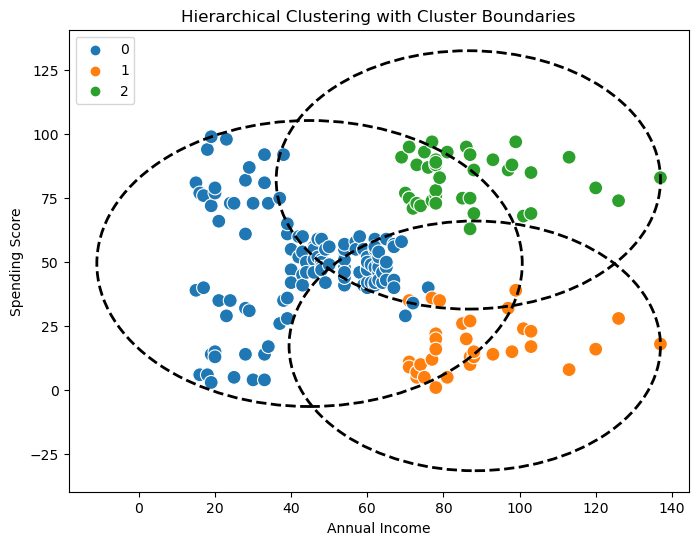

In [82]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=seg_data,x=seg_data.iloc[:, 1],y=seg_data.iloc[:, 2],hue=hierarical_clustering.labels_,s=100,palette='tab10')

# Draw circles
for cluster in np.unique(hierarical_clustering.labels_):
    cluster_points = seg_data[seg_data['clust'] == cluster]
     # Center (mean just for visualization)
    center_x = cluster_points.iloc[:,1].mean()
    center_y = cluster_points.iloc[:,2].mean()

    # Radius = max distance from center
    radius = np.max(
        np.sqrt((cluster_points.iloc[:,1] - center_x)**2 +
                (cluster_points.iloc[:,2] - center_y)**2)
    )

    circle = plt.Circle(
        (center_x, center_y),
        radius,
        fill=False,
        linestyle='--',
        linewidth=2
    )

    plt.gca().add_patch(circle)


plt.title("Hierarchical Clustering with Cluster Boundaries")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


In [123]:
mall_data

,custId,Gender,Age,Income,Spend,clust
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1
